In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
ssb_planar_workdir = "output/ssb_planar/150-40-0/20-55-20/5.0e-07/"

In [3]:
def fetch_simulation_metadata(workdir, Wa_n=1e-3, Wa_p=1e-3, gamma=25.0):
    metadata_file = os.path.join(workdir, f"{str(float(Wa_n))}-{str(float(Wa_p))}", f"{str(float(gamma))}", "simulation.json")
    with open(metadata_file) as f:
        data = json.load(f)#[0]
    return data

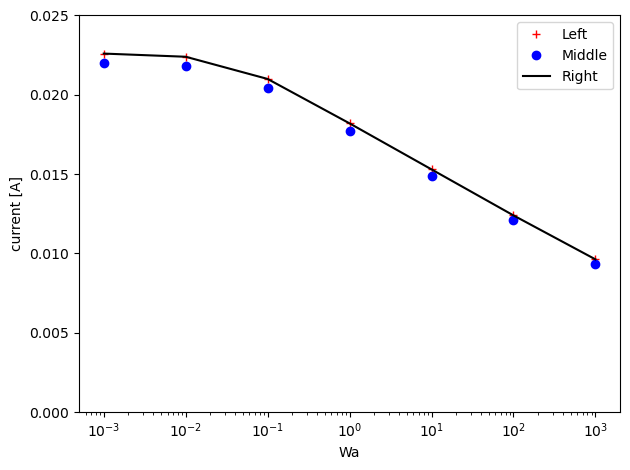

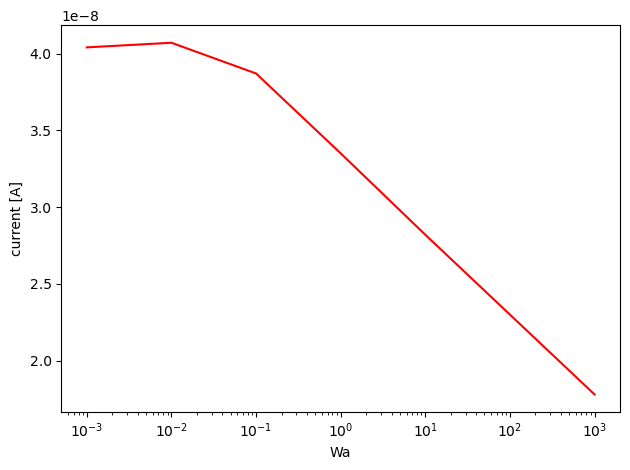

In [5]:
I_left = []
I_mid = []
I_right = []
I_insulated = []
positive_wa = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for Wa_p in positive_wa:
    data = fetch_simulation_metadata(ssb_planar_workdir, Wa_p=Wa_p)
    I_left.append(float(data["Current at negative am - electrolyte boundary"].strip(" A")))
    I_mid.append(float(data["Current at electrolyte - positive am boundary"].strip(" A")))
    I_right.append(float(data["Current at right boundary"].strip(" A")))
    I_insulated.append(float(data["Current at insulated boundary"].strip(" A")))

fig, ax = plt.subplots()
ax.semilogx(positive_wa, I_left, 'r+', label='Left')
ax.semilogx(positive_wa, I_mid, 'bo', label='Middle')
ax.semilogx(positive_wa, I_right, 'k-', label='Right')
ax.set_ylabel('current [A]')
# ax.set_ylim([0, 0.025])
ax.set_xlabel('Wa')
ax.legend()
plt.tight_layout()
plt.savefig('figures/sipdg/planar/planar-current-interfaces.png')

fig, ax = plt.subplots()
ax.semilogx(positive_wa, I_insulated, 'r', label='Left')
ax.set_ylabel('current [A]')
ax.set_xlabel('Wa')
# ax.legend()
plt.tight_layout()
plt.savefig('figures/sipdg/planar/planar-current-insulated.png')